# Hodgkin-Huxley Model: Spike Train Analysis

This notebook analyzes the generation and characteristics of spike trains in response to sustained stimuli.

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt
from src.model import HodgkinHuxleyModel
from src.visualization import plot_membrane_potential, plot_phase_plane

# %matplotlib inline
plt.style.use('seaborn-darkgrid')

/var/folders/j5/9drs1nyn0c37q_29h5sv9xdh0000gn/T/ipykernel_81815/914350016.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## 1. Sustained Current Response

Let's examine how the neuron responds to sustained current input.

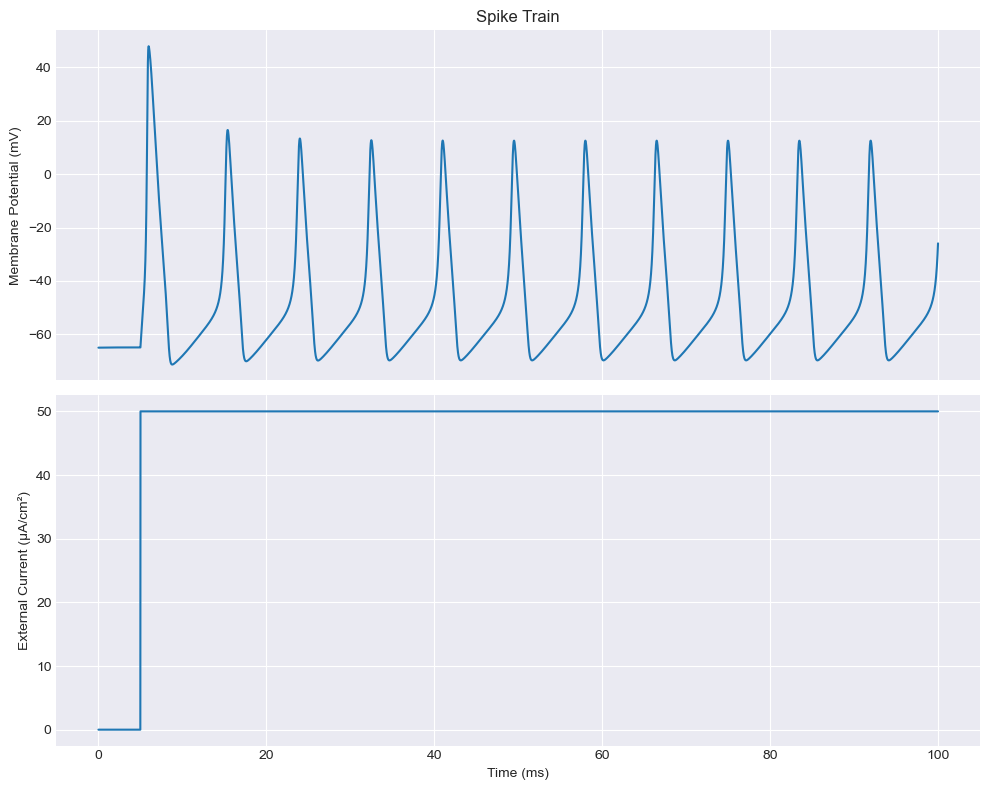

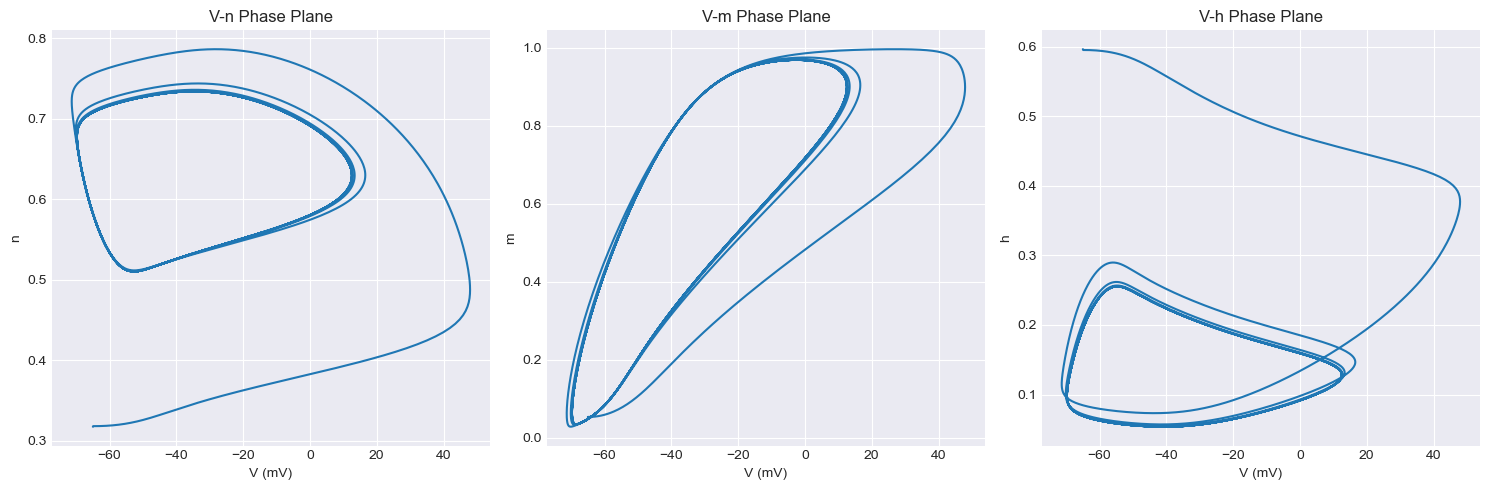

In [19]:
def sustained_current(t, amplitude=50, start=5):
    """Generate a sustained current step."""
    return amplitude if t >= start else 0

# Create model instance
model = HodgkinHuxleyModel()

# Simulate with sustained current
t_span = [0, 100]  # 100ms simulation
t, V, n, m, h = model.simulate(t_span, I_ext_func=lambda t: sustained_current(t))

# Create current array for plotting
I_ext = np.array([sustained_current(t_i) for t_i in t])

# Plot results
fig1 = plot_membrane_potential(t, V, "Spike Train", I_ext)
plt.savefig('../data/results/spike_train.png')
plt.show()

# Plot phase plane trajectory
fig2 = plot_phase_plane(V, n, m, h)
plt.savefig('../data/results/phase_plane.png')
plt.show()

## 2. Frequency Analysis

Now let's analyze how spike frequency depends on input current.

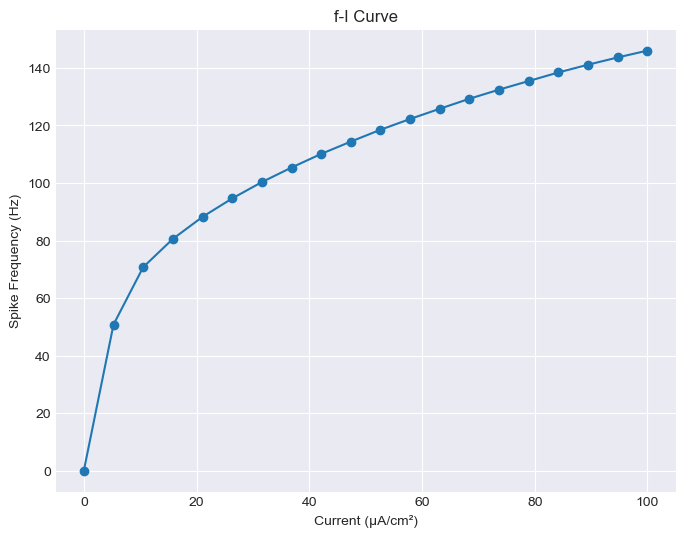

In [15]:
def calculate_spike_frequency(V, t, threshold=-20):
    """Calculate spike frequency from voltage trace."""
    # Find spike times (voltage crosses threshold from below)
    spikes = np.where((V[1:] >= threshold) & (V[:-1] < threshold))[0]
    
    if len(spikes) < 2:
        return 0
    
    # Calculate intervals between spikes
    intervals = np.diff(t[spikes])
    
    # Return frequency in Hz (converting from ms to s)
    return 1000 / np.mean(intervals)

# Test range of current amplitudes
current_range = np.linspace(0, 100, 20)
frequencies = []

for I in current_range:
    model.reset_state()
    t, V, n, m, h = model.simulate([0, 100], I_ext_func=lambda t: sustained_current(t, amplitude=I))
    freq = calculate_spike_frequency(V, t)
    frequencies.append(freq)

# Plot f-I curve
plt.figure(figsize=(8, 6))
plt.plot(current_range, frequencies, 'o-')
plt.xlabel('Current (μA/cm²)')
plt.ylabel('Spike Frequency (Hz)')
plt.title('f-I Curve')
plt.grid(True)
plt.savefig('../data/results/f-I_curve.png')
plt.show()